In [1]:
# Plots up comparison of retrievals between rrlfe and SSPP, and transforms the rrlfe
# values to SSPP by finding residual line relative to 1-to-1, and subtracting the residual out 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# simulated SSPP data
vals_sspp = np.linspace(-2.8,0.3,100)+np.random.normal(loc=0.0, scale=0.15, size=100)
vals_lamost_r = np.linspace(-2.6,0.1,80)+np.random.normal(loc=0.0, scale=0.2, size=80)

# simulated rrlfe data
vals_rrlfe = vals_sspp*0.8 + np.random.normal(loc=0.0, scale=0.05, size=100) - 0.2

In [3]:
m_b, b_b = np.polyfit(vals_sspp,vals_rrlfe,1) # _b: best-fit
# find offset between residuals and zero
#y_offset_lit = m_b*feh_basis_loc + b_b

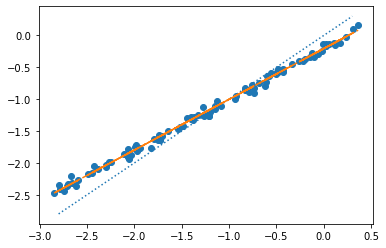

In [4]:
plt.scatter(vals_sspp,vals_rrlfe)
plt.plot([-2.8,0.3],[-2.8,0.3],linestyle=":")
plt.plot(vals_sspp, m_b*vals_sspp + b_b,linestyle="--")
plt.show()

In [5]:
# find residual best-fit line

resids = (m_b-1)*vals_sspp + b_b

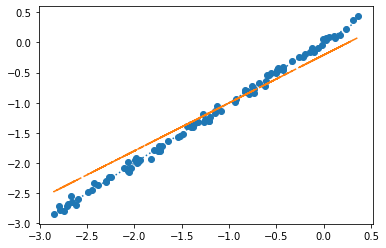

In [6]:
plt.scatter(vals_sspp, vals_rrlfe - resids)
plt.plot([-2.8,0.3],[-2.8,0.3],linestyle=":")
plt.plot(vals_sspp, m_b*vals_sspp + b_b,linestyle="--")
plt.show()

In [9]:
# put everything into a single function

def rrlfe_corrected(vals_sspp, vals_rrlfe):
    '''
    Finds residual between rrlfe and SSPP values
    
    INPUTS:
    vals_sspp: SSPP [Fe/H] values (x); these are the ones we want to map onto
    vals_rrlfe: rrlfe [Fe/H] values (y)
    
    RETURNS:
    values of rrlfe [Fe/H] mapped onto SSPP
    '''
    
    # initial best fit between rrlfe vs. SSPP
    m_b, b_b = np.polyfit(vals_sspp,vals_rrlfe,1) # _b: best-fit
    
    # find residual best-fit line
    resids = (m_b-1)*vals_sspp + b_b
    
    return {"m_b": m_b, "b_b": b_b, "corrected": vals_rrlfe - resids}

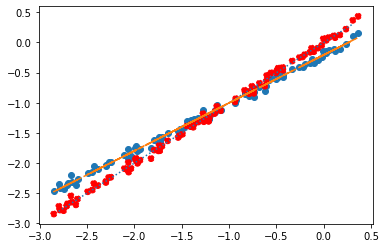

In [11]:
# check

plt.scatter(vals_sspp, vals_rrlfe)
plt.plot([-2.8,0.3], [-2.8,0.3], linestyle=":")
plt.plot(vals_sspp, m_b*vals_sspp + b_b, linestyle="--")
plt.scatter(vals_sspp, rrlfe_corrected(vals_sspp, vals_rrlfe)['corrected'], linestyle="--", color="red")
plt.show()

In [17]:
# now, we have to find the linear relation between rrlfe_c (i.e., corrected)
# and rrlfe_r (i.e., raw) Fe/H values

m_c, b_c = np.polyfit(vals_rrlfe,rrlfe_corrected(vals_sspp, vals_rrlfe)['corrected'],1)

In [18]:
print(m_c, b_c)

1.249004167417938 0.2476532542477488


In [21]:
# let's say we have raw rrlfe values from LAMOST, and we want to correct them
# and compare the two sets of values

vals_lamost_c = m_c*vals_lamost_r + b_c

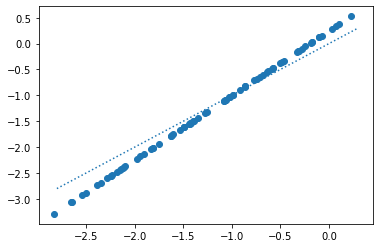

In [22]:
plt.scatter(vals_lamost_r, vals_lamost_c)
plt.plot([-2.8,0.3], [-2.8,0.3], linestyle=":")
#plt.plot(vals_sspp, m_b*vals_sspp + b_b, linestyle="--")
#plt.scatter(vals_sspp, rrlfe_corrected(vals_sspp, vals_rrlfe)['corrected'], linestyle="--", color="red")
plt.show()